In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

import warnings 
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('raptrain.csv') 
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape


(10886, 12)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [9]:
parts = df["datetime"].str.split(" ", n=2, expand=True) 
df["date"] = parts[0] 
df["time"] = parts[1].str[:2].astype('int') 
df.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4


In [10]:
parts = df["date"].str.split("-", n=3, expand=True) 
df["day"] = parts[0].astype('int') 
df["month"] = parts[1].astype('int') 
df["year"] = parts[2].astype('int') 
df.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,2011,1,1


In [12]:
import pandas as pd
from datetime import datetime

def is_valid_date(year, month, day):
    try:
        datetime(year, month, day)
        return True
    except ValueError:
        return False

def weekend_or_weekday(year, month, day):
    d = datetime(year, month, day)
    return 0 if d.weekday() > 4 else 1

# Validate the date before applying the weekend_or_weekday function
df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']) 
                         if is_valid_date(x['year'], x['month'], x['day']) else None, axis=1)

print(df.head())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count        date  time   day  \
0        81        0.0       3          13     16  2011-01-01     0  2011   
1        80        0.0       8          32     40  2011-01-01     1  2011   
2        80        0.0       5          27     32  2011-01-01     2  2011   
3        75        0.0       3          10     13  2011-01-01     3  2011   
4        75        0.0       0           1      1  2011-01-01     4  2011   

   month  year weekday  
0      1     1    None  
1      1     1    

In [13]:
def am_or_pm(x): 
	if x > 11: 
		return 1
	else: 
		return 0


df['am_or_pm'] = df['time'].apply(am_or_pm) 
df.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,1,1,None,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,1,1,None,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,2011,1,1,None,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,2011,1,1,None,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,2011,1,1,None,0


In [16]:
from datetime import date 
import holidays 


def is_holiday(x): 

	india_holidays = holidays.country_holidays('IN') 

	if india_holidays.get(x): 
		return 1
	else: 
		return 0


df['holidays'] = df['date'].apply(is_holiday) 
df.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,1,1,None,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,1,1,None,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,2011,1,1,None,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,2011,1,1,None,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,2011,1,1,None,0,0


In [17]:
df.drop(['datetime', 'date'], 
		axis=1, 
		inplace=True) 


In [18]:
df.isnull().sum()


season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
time              0
day               0
month             0
year              0
weekday       10886
am_or_pm          0
holidays          0
dtype: int64

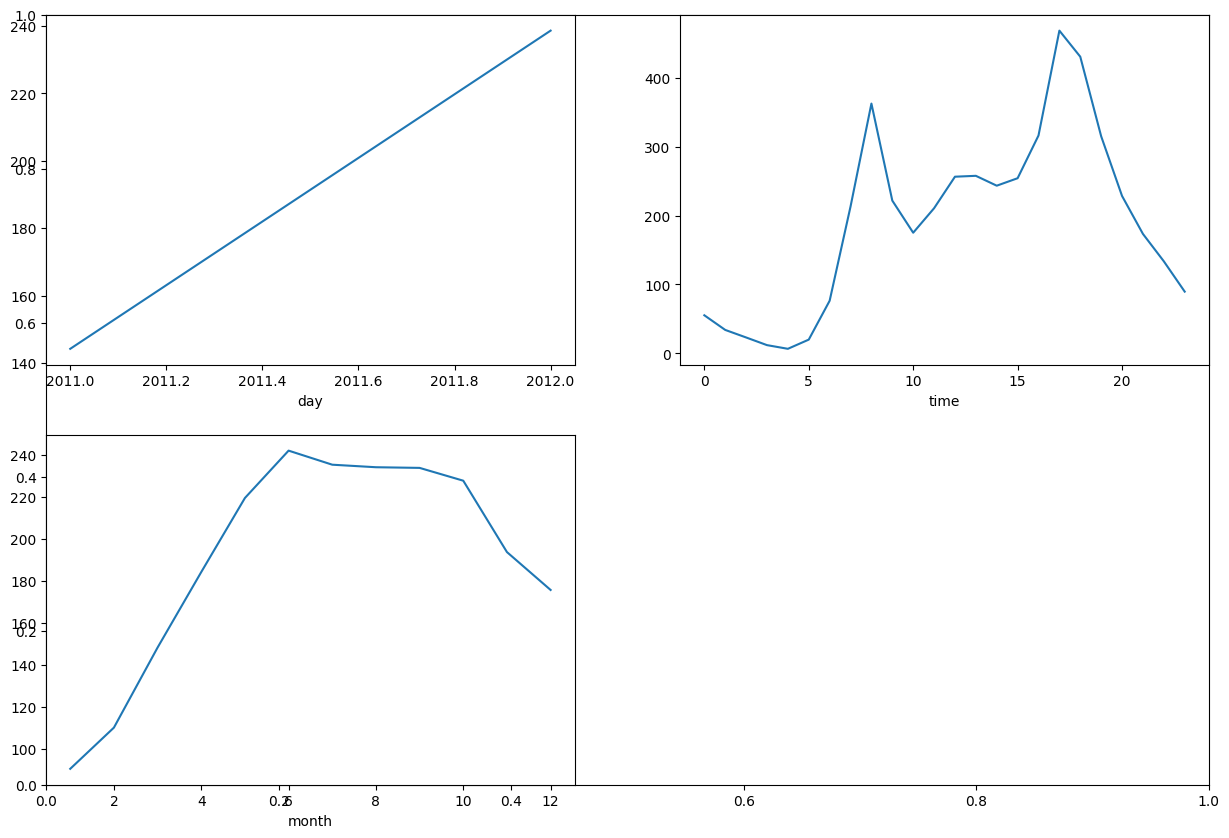

In [19]:
features = ['day', 'time', 'month'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
	plt.subplot(2, 2, i + 1) 
	df.groupby(col).mean()['count'].plot() 
plt.show() 


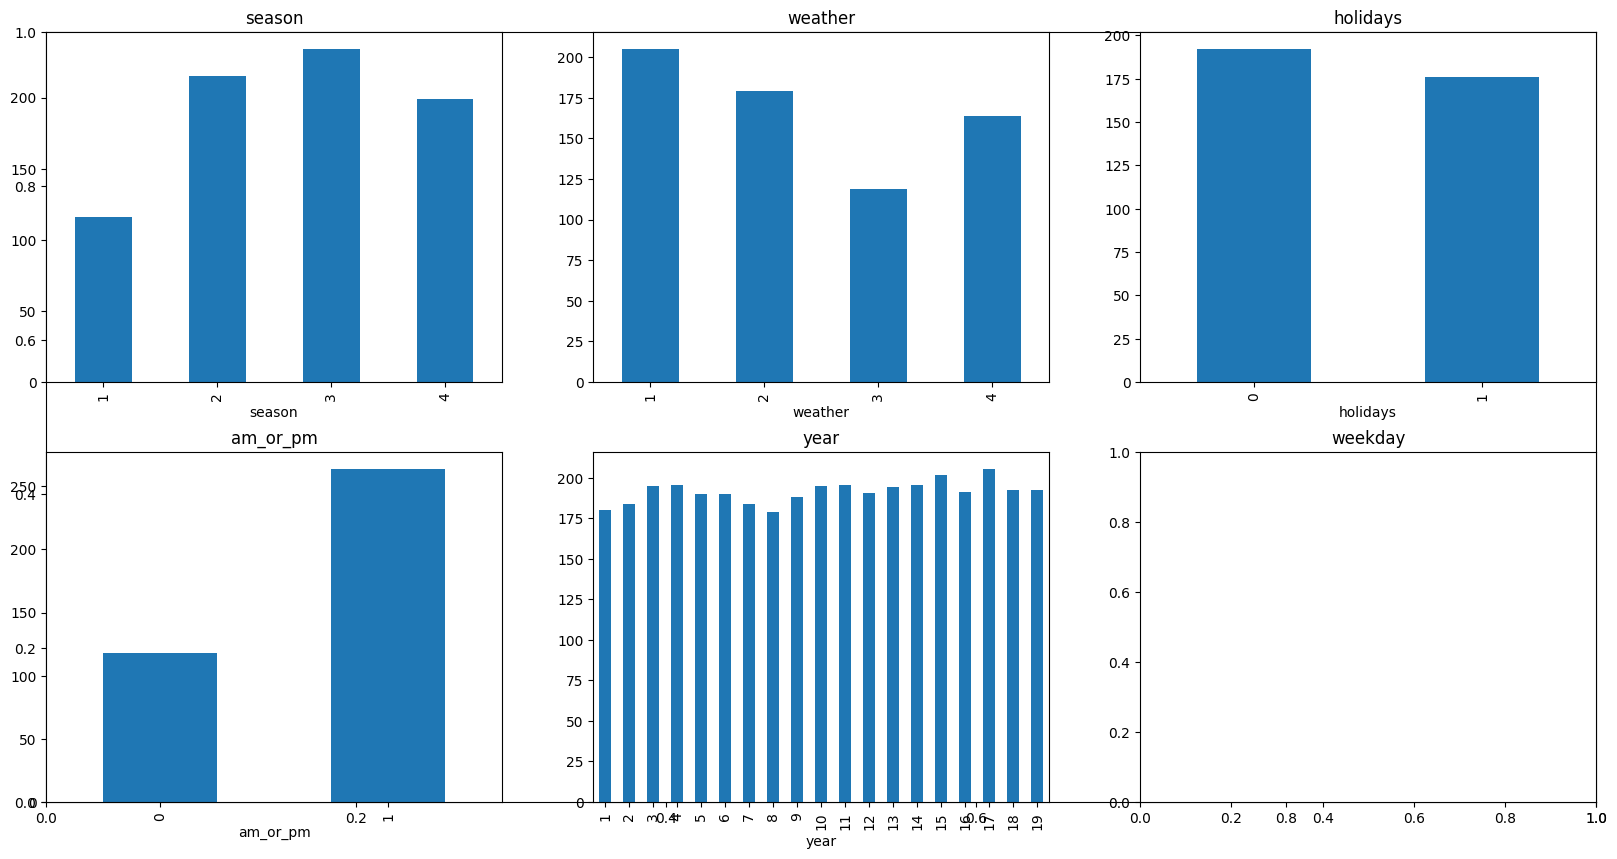

In [22]:
import matplotlib.pyplot as plt

# Define features to plot
features = ['season', 'weather', 'holidays', 'am_or_pm', 'year', 'weekday']

# Check if all features exist in the DataFrame
for feature in features:
    if feature not in df.columns:
        print(f"Feature '{feature}' does not exist in the DataFrame.")
        features.remove(feature)

# Plotting
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    # Group by the feature and plot the mean of 'count' only if the group is not empty
    if not df.groupby(col)['count'].mean().empty:
        df.groupby(col).mean()['count'].plot.bar()
    plt.title(col)
plt.show()


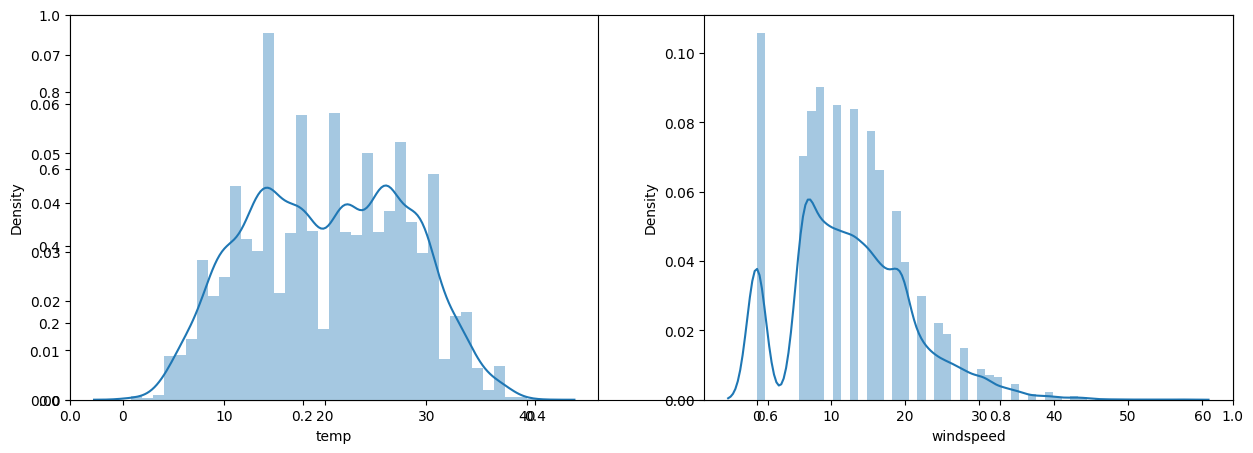

In [24]:
features = ['temp', 'windspeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
    plt.subplot(1, 2, i + 1) 
    sb.distplot(df[col]) 
plt.show()


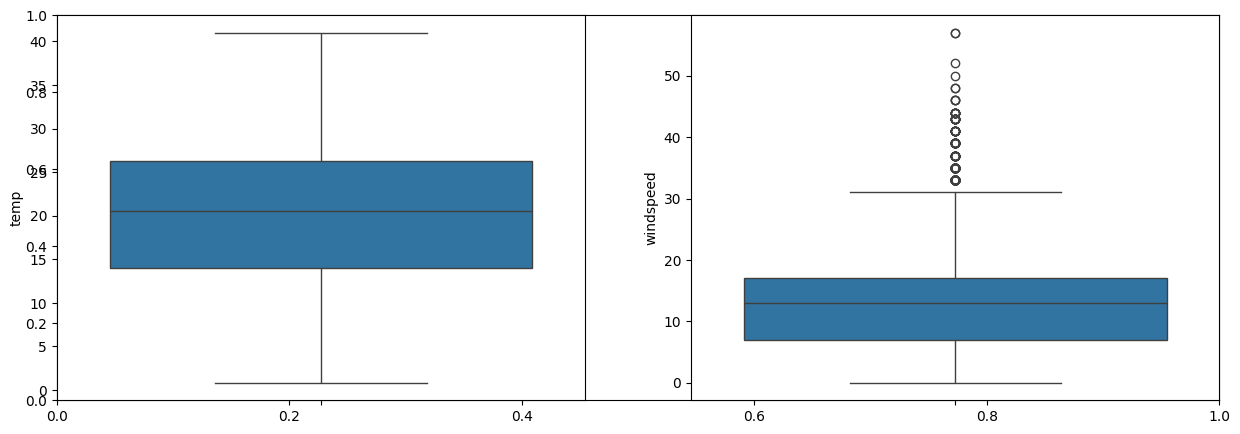

In [26]:
features = ['temp', 'windspeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
    plt.subplot(1, 2, i + 1) 
    sb.boxplot(df[col]) 
plt.show()


In [27]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0] 
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')


Number of rows that will be lost if we remove outliers is equal to 227.


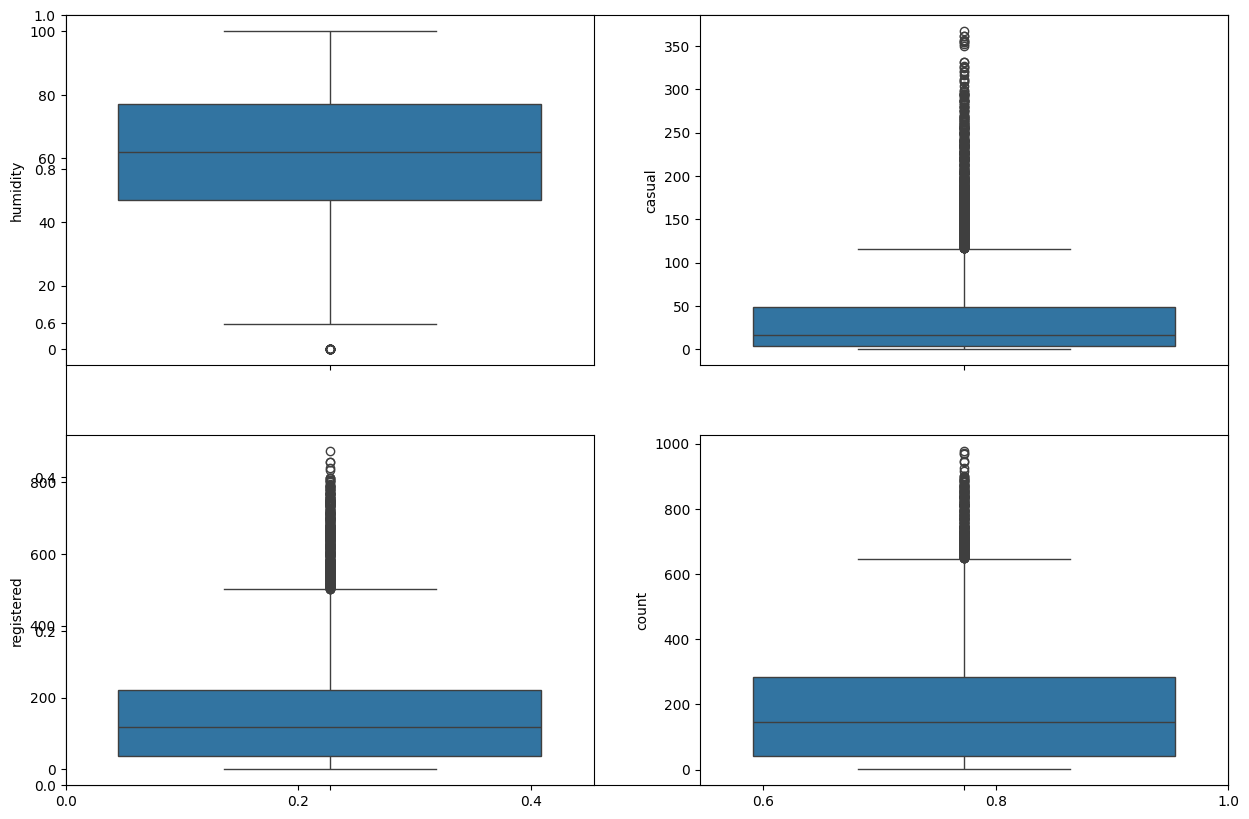

In [28]:
features = ['humidity', 'casual', 'registered', 'count'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
	plt.subplot(2, 2, i + 1) 
	sb.boxplot(df[col]) 
plt.show() 


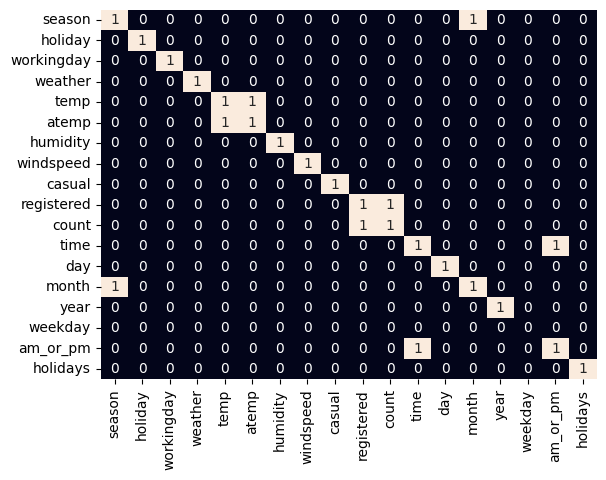

In [29]:
sb.heatmap(df.corr() > 0.8, 
		annot=True, 
		cbar=False) 
plt.show()


In [30]:
df.drop(['registered', 'time'], axis=1, inplace=True) 
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]


In [31]:
features = df.drop(['count'], axis=1) 
target = df['count'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, 
												target, 
												test_size = 0.1, 
												random_state=22) 
X_train.shape, X_val.shape


((9574, 15), (1064, 15))

In [33]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 


In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error as mae
# Split the data into features and target variable
X = df.drop(columns=['count'])
y = df['count']

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Define models
models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

# Train and evaluate models
for model in models:
    model.fit(X_train_imputed, y_train)
    print(f'{model.__class__.__name__} :')

    # Predict and evaluate on training set
    train_preds = model.predict(X_train_imputed)
    print('Training Error: ', mae(y_train, train_preds))

    # Predict and evaluate on validation set
    val_preds = model.predict(X_val_imputed)
    print('Validation Error: ', mae(y_val, val_preds))
    print()


LinearRegression :
Training Error:  81.75285577087993
Validation Error:  82.26992133853146

XGBRegressor :
Training Error:  35.24546324974878
Validation Error:  61.357145969555944

Lasso :
Training Error:  81.16735429356247
Validation Error:  81.72955341922612

RandomForestRegressor :
Training Error:  22.455954334303247
Validation Error:  60.36333063686001

Ridge :
Training Error:  81.746385258875
Validation Error:  82.26460662293829

